In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#https://seaborn.pydata.org/generated/seaborn.relplot.html#

https://seaborn.pydata.org/examples/index.html

Seaborn — это библиотека для создания статистических графиков на Python. Она основывается на matplotlib и тесно взаимодействует со структурами данных pandas.

Перед тем, как мы начнем строить графики, нам нужны данные. Прелесть seaborn в том, что он работает непосредственно с объектами dataframe из pandas, что делает ее очень удобной. Более того, библиотека поставляется с некоторыми встроенными наборами данных, которые можно использовать прямо из кода, и не загружать файлы вручную.

Seaborn - это заложенный в нее механизм предобработки данных, возможный благодаря тесной интеграции с библиотекой Pandas. Данные можно передавать прямо в объектах DataFrame, а Seaborn сама выполнит всю необходимую работу: агрегацию (выделение подмножеств), статистическую обработку (например вычисление доверительных интервалов) и визуальное выделение полученных результатов

In [3]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flights_data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


# Scatter Plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

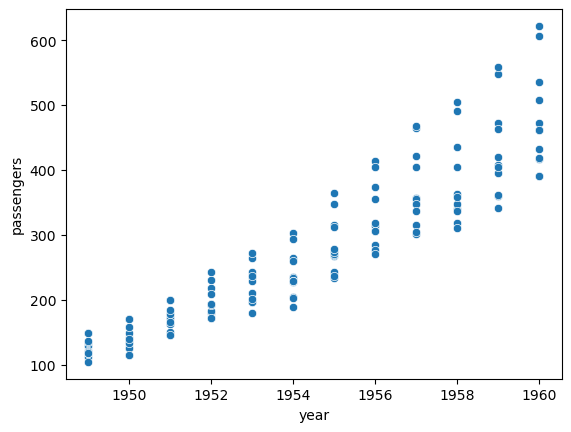

In [3]:
sns.scatterplot(data=flights_data, x="year", y="passengers")

# Line Plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

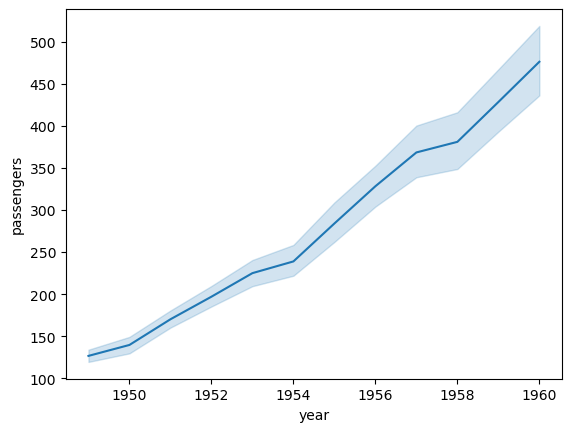

In [4]:
sns.lineplot(data=flights_data, x="year", y="passengers")

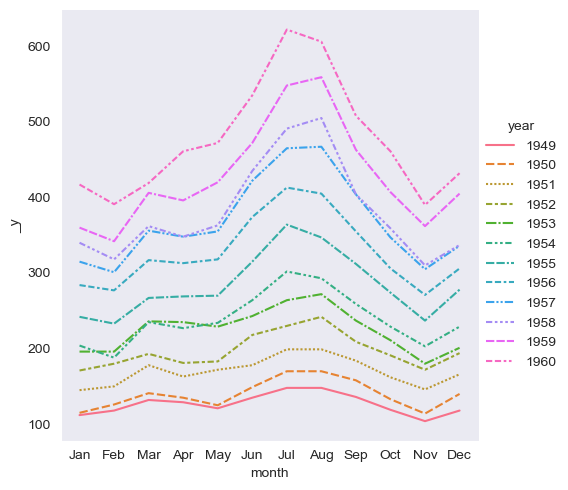

In [43]:
flights_wide_data = flights_data.pivot(index="month", columns="year", values="passengers")
sns.relplot(data=flights_wide_data, kind='line');

# Bar Plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

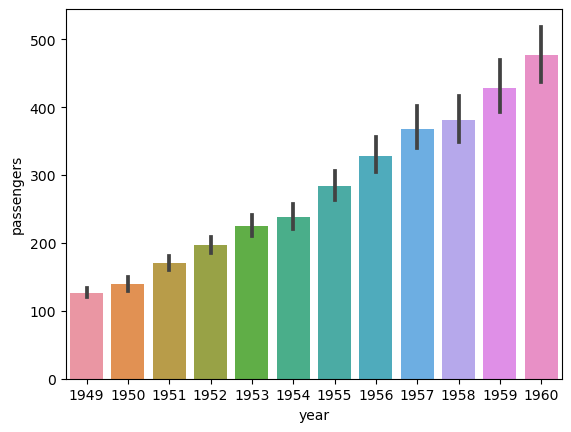

In [5]:
sns.barplot(data=flights_data, x="year", y="passengers")

Seaborn основывается на matplotlib, расширяя ее функциональные возможности и абстрагируя сложность. При этом seaborn не теряет в своей мощности. Любая диаграмма seaborn может быть кастомизирована с помощью функций из библиотеки matplotlib. Эта механика может пригодиться в определенных случаях и позволяет seaborn использовать возможности matplotlib без необходимости переписывать все ее функции.

<AxesSubplot:xlabel='depth', ylabel='count'>

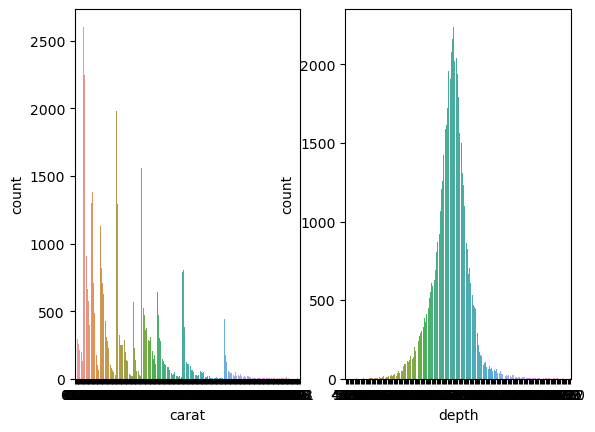

In [6]:
diamonds_data = sns.load_dataset('diamonds')
plt.subplot(1, 2, 1)
sns.countplot(x='carat', data=diamonds_data)
plt.subplot(1, 2, 2)
sns.countplot(x='depth', data=diamonds_data)

С помощью функции subplot на одном графике можно построить несколько диаграмм. Функция принимает в себя три параметра: первый – количество строк, второй – количество столбцов, третий – количество диаграмм.

Seaborn дает возможность менять интерфейс графиков. 

Для этого из коробки у нас в распоряжении есть пять стилей: darkgrid, whitegrid, dark, white и ticks.

<AxesSubplot:xlabel='year', ylabel='passengers'>

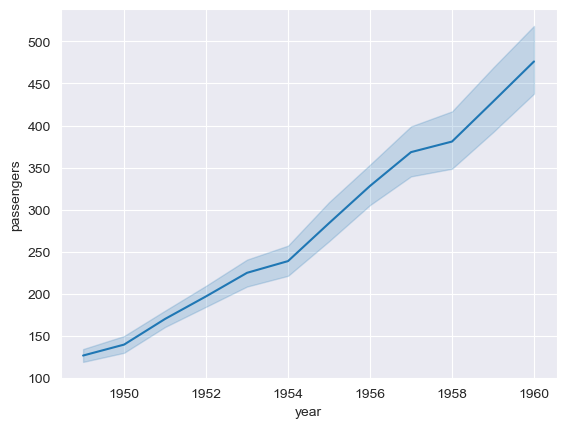

In [8]:
sns.set_style("darkgrid")
sns.lineplot(data = flights_data, x = "year", y = "passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

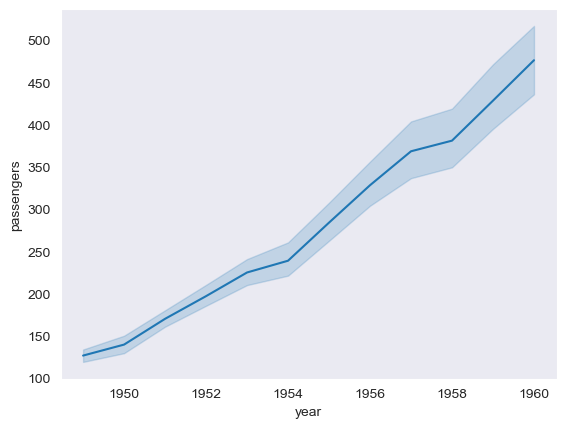

In [11]:
sns.set_style("dark")
sns.lineplot(data = flights_data, x = "year", y = "passengers")

In [12]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips_df["tip_percentage"] = tips_df["tip"] / tips_df["total_bill"]
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

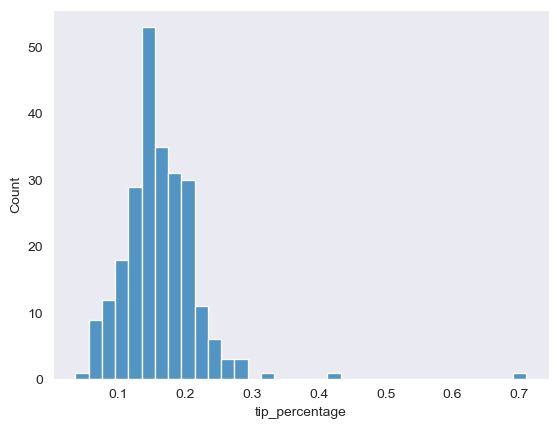

In [45]:
sns.histplot(tips_df["tip_percentage"])

<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

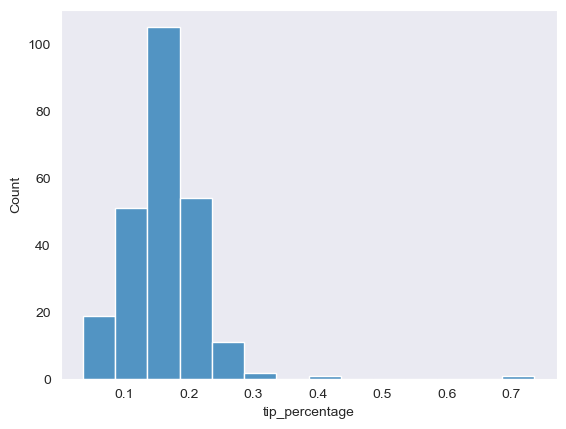

In [14]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(tips_df["tip_percentage"], binwidth=0.05)

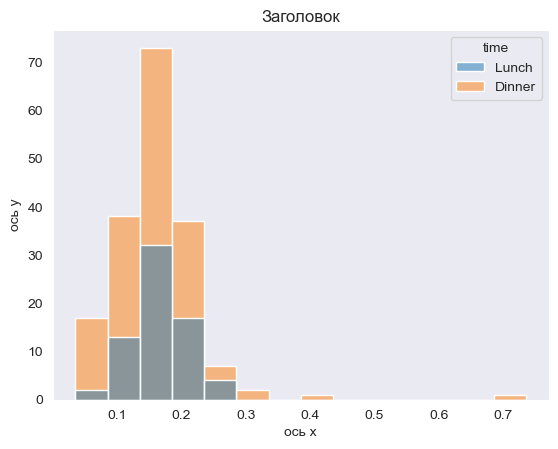

In [68]:

    
ax = sns.histplot(data=tips_df, x="tip_percentage", binwidth=0.05, hue="time")
ax.set (xlabel='ось x', ylabel='ось y', title='Заголовок')
plt.show() 

Text(0.5, 1.0, 'Sales by Quarter')

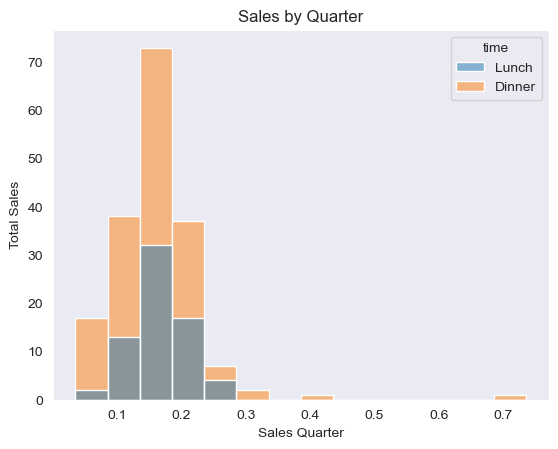

In [65]:
#create seaborn barplot
ax = sns.histplot(data=tips_df, x="tip_percentage", binwidth=0.05, hue="time")

#specify axis labels
plt.xlabel('ось x')
plt.ylabel('ось y')
plt.title('Заголовок')


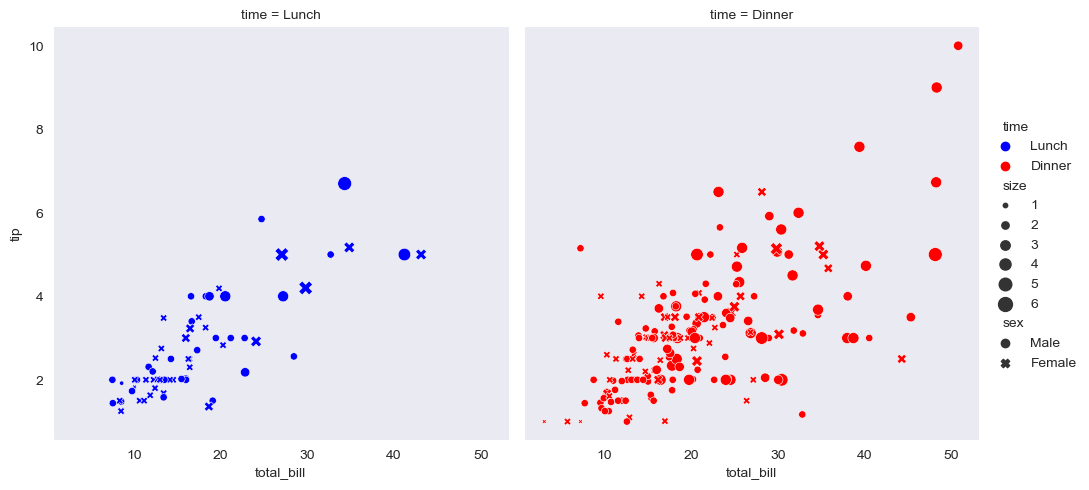

In [80]:
sns.relplot(
    data=tips_df, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

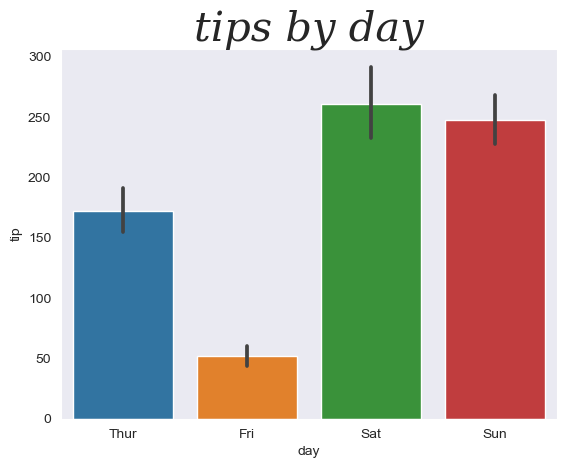

In [61]:
#можно добавлять любы варианты оценки (mean, median)
ax = sns.barplot(data=tips_df, x="day", y="tip", estimator=np.sum).set_title('tips by day', fontfamily = 'serif', fontstyle = 'italic',
fontsize = 30)


<AxesSubplot:xlabel='size', ylabel='day'>

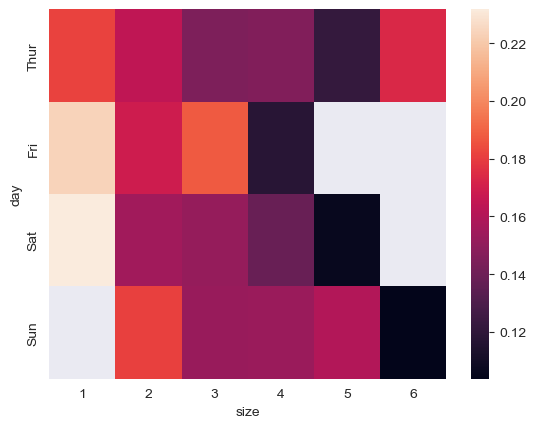

In [17]:
pivot = tips_df.pivot_table(
    index=["day"],
    columns=["size"],
    values="tip_percentage",
    aggfunc=np.average)
sns.heatmap(pivot)

In [ ]:
#дополнительные характеристики

In [24]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


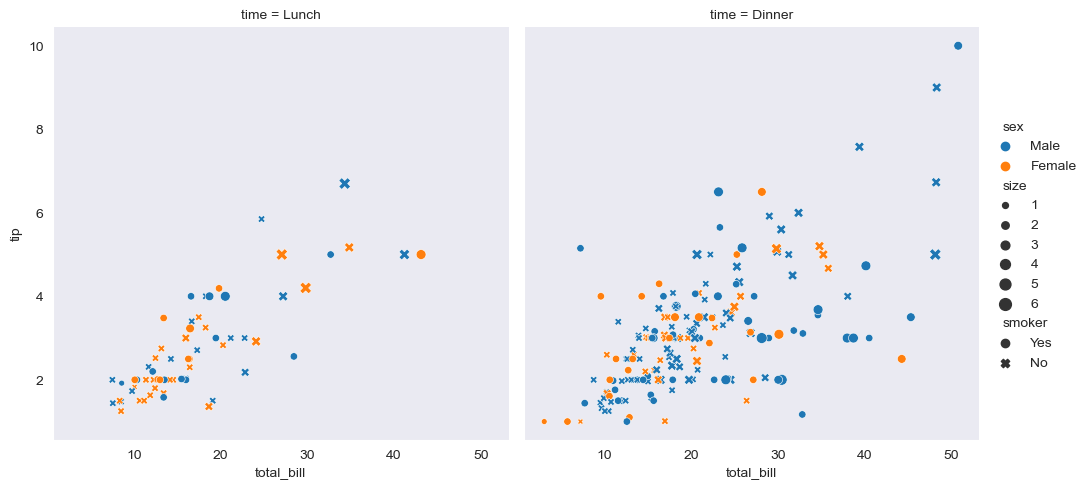

In [23]:
sns.relplot(
    data=tips_df,
    x='total_bill',
    y='tip',
    col='time',
    hue='sex',
    style='smoker',
    size='size')

sns.set_theme(), которая использует систему rcParam для настройки стиля графиков. Стиль графиков, после этой команды изменится даже если их строить только средствами Matplotlib. Помимо темы, используемой по умолчанию, есть и другие, если вам нравится стиль используемый Matplotlib по умолчанию, то данную команду можно вообще не использовать.

Следующая команда - tips = sns.load_dataset('tips') использует функцию load_dataset(), которая создана в Seaborn только для демонстрации примеров работы с библиотекой. Данная функция загружает набор демонстрационных данных в виде Dataframe из репозитория GitHub и в реальных условиях может быть заменена на функцию read_csv() библиотеки Pandas. В качестве аргумента функции load_dataset() была передана строка с именем необходимого датафрейма 'tips' - данные о размере чаевых в ресторане.

Мы просто передали переменную tips параметру data, не выполняя никаких преобразований формата данных. В параметре x мы указали имя столбца из датафрейма Pandas, который содержит информацию об общей стоимости заказа, а в параметре y имя столбца с размером чаевых. Но на этом все только начинается... в параметре col мы указали имя столбца с информацией о времени дня в которое был обслужен столик - это привело к тому, что было построено два графика разброса для первой и второй половины дня. Обратите внимание, что Seaborn сама выполнила разбиение данных на подмножества. Точно так же, с помощью параметра hue были выделены цветом два подмножества пола людей оплачивавших заказ ('sex'), а размер точек, благодаря параметру size='size', начал соответствовать количеству людей за столиком.

In [25]:
penguins = sns.load_dataset("penguins")

In [26]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


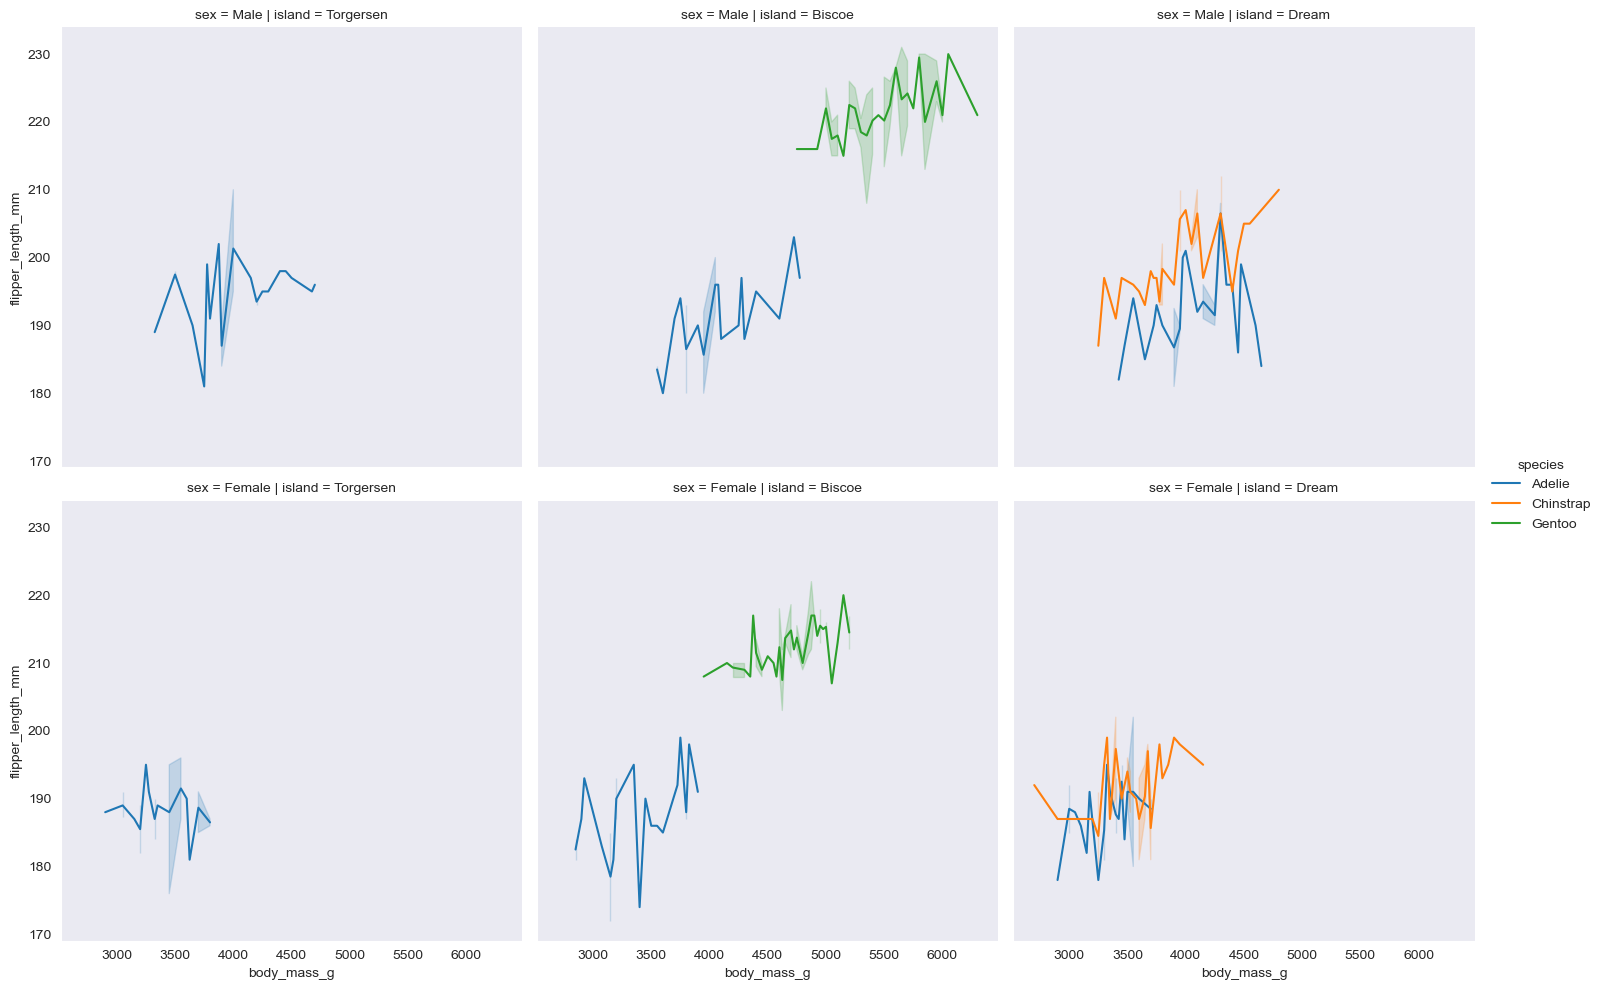

In [69]:
sns.relplot(data=penguins,
            kind='line',
            x='body_mass_g',
            y='flipper_length_mm',
            col='island',
            row='sex',
            hue='species');

С помощью параметров col и row мы создали три столбца графиков для каждого отдельного острова и две строки для самцов и самок. Но самое интересное, это параметр hue, который может выделять цветом подмножества в данных, как на графиках разброса, так и линейных графиках. В данном случае с помощью параметра hue мы выделили цветом три разных вида пингвинов, благодаря чему стало заметно, что некоторые виды могут совместно обитать на одном острове. При этом мы могли бы построить все эти данные и на одном графике, воспользовавшись уже знакомыми параметрами style и size

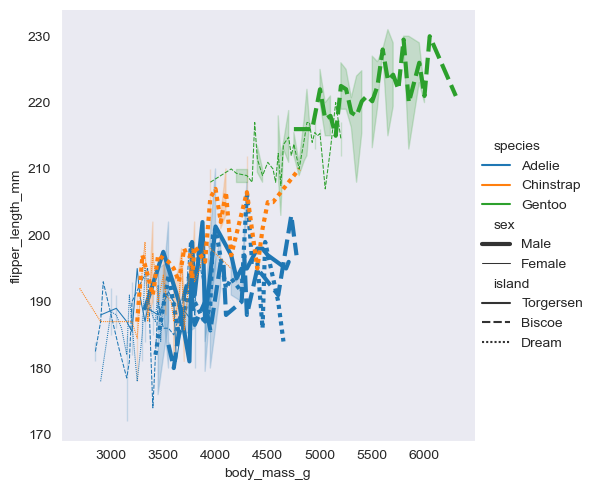

In [71]:
sns.relplot(data=penguins,
            kind='line',
            x='body_mass_g',
            y='flipper_length_mm',
            hue='species',
            style='island',
            size='sex');

Суть все же в том, что для рисования разных видов графиков используется одна и таже функция relplot(), переключаемая на разные типы графиков с помощью параметра kind. При этом для визуальной семантики подмножеств данных используются одни и теже параметры: для relplot() это hue, style и size

# Модели линейной регрессии

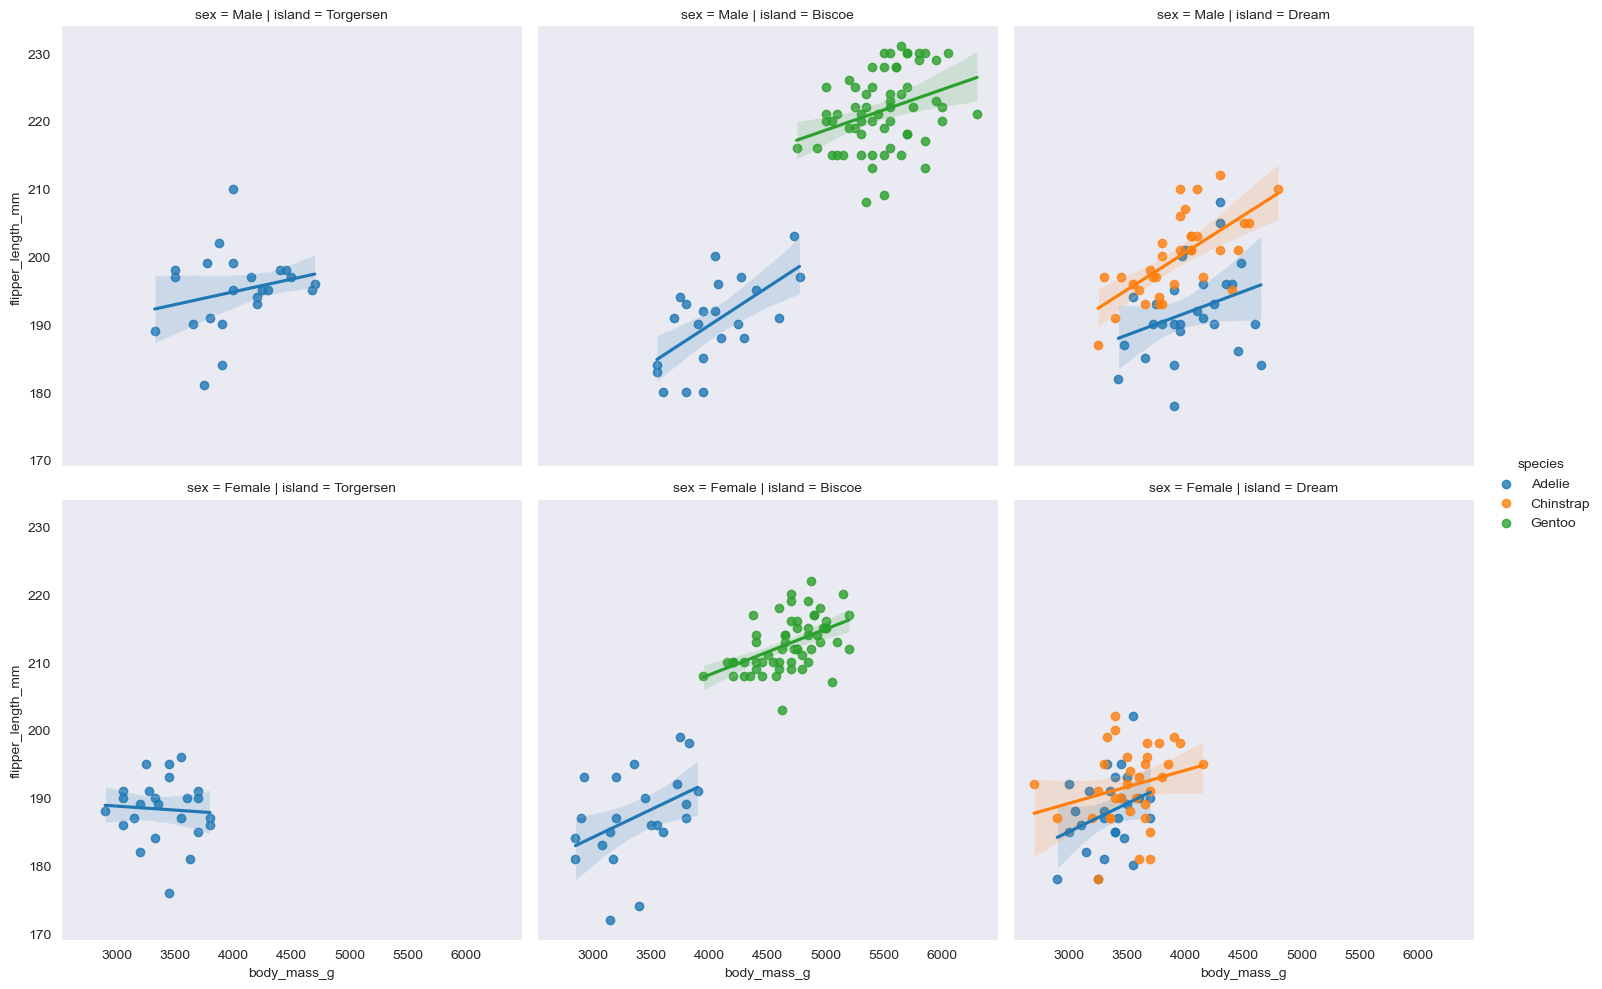

In [29]:
sns.lmplot(data=penguins,
            x='body_mass_g',
            y='flipper_length_mm',
            col='island',
            row='sex',
            hue='species');

# Построение распределений

Что бы визуально оценить распределение мы можем воспользоваться функцией displot(), которая по умолчанию рисует гистограммы (т.е. kind='hist')

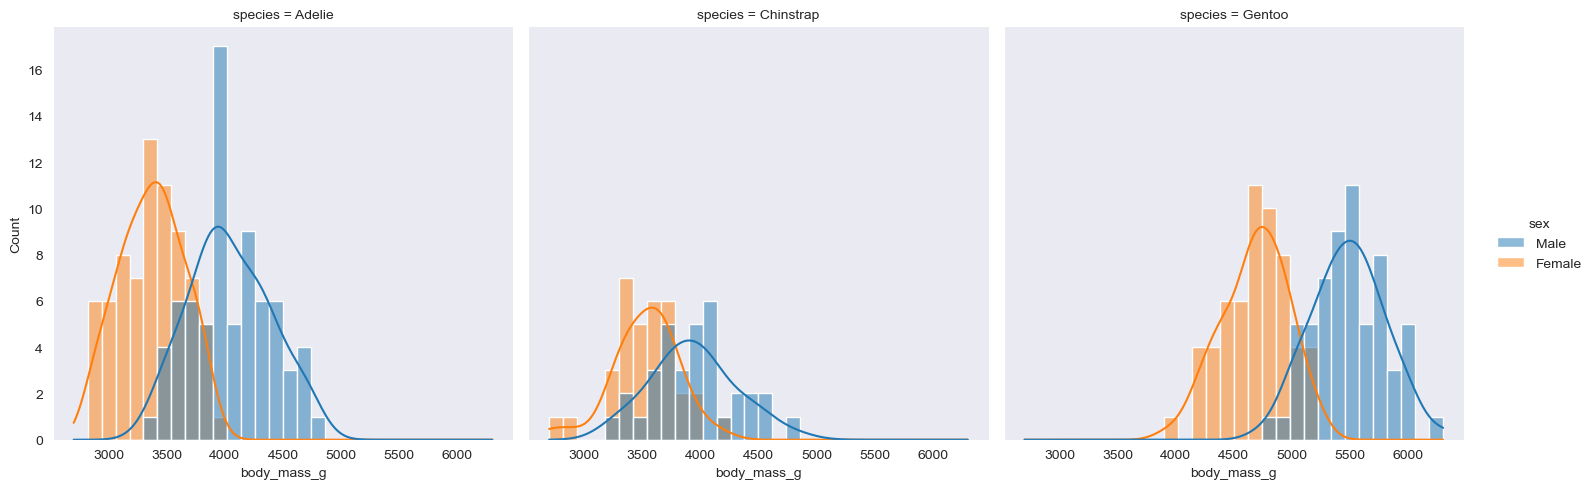

In [73]:
sns.displot(data=penguins,
            x='body_mass_g',
            hue='sex',
            col='species',
            bins=30,
            kde=True);

# Категориальные данные

Если нас интересует распределение значений внутри категорий (внутри подмножеств данных), то лучше воспользоваться функцией catplot() которая по умолчанию рисует график разброса значений внутри каждой категории (т.е. kind='strip')

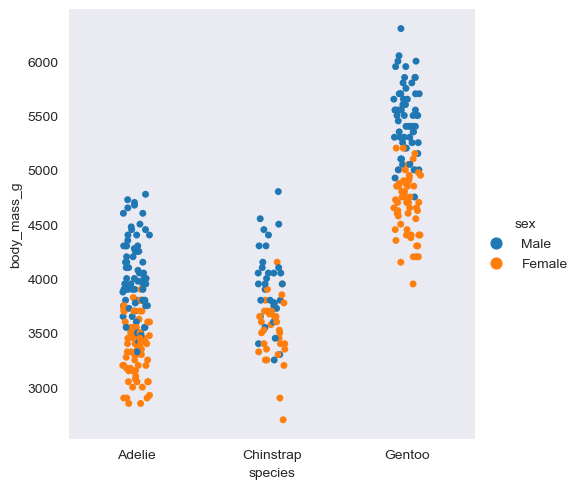

In [32]:
sns.catplot(data=penguins,
            x='species',
            y='body_mass_g',
            hue='sex');

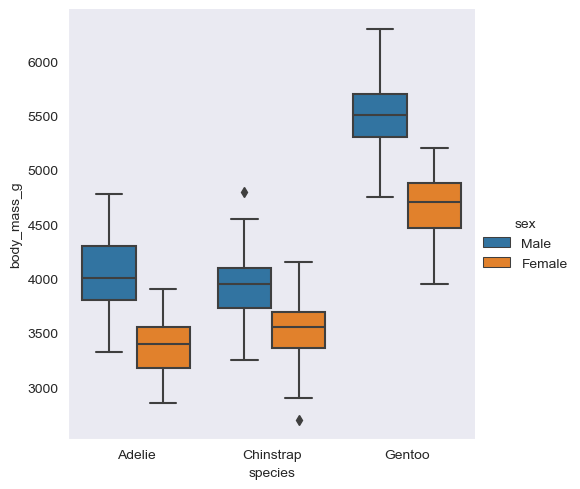

In [33]:
sns.catplot(data=penguins,
            x='species',
            y='body_mass_g',
            hue='sex',
            kind='box');

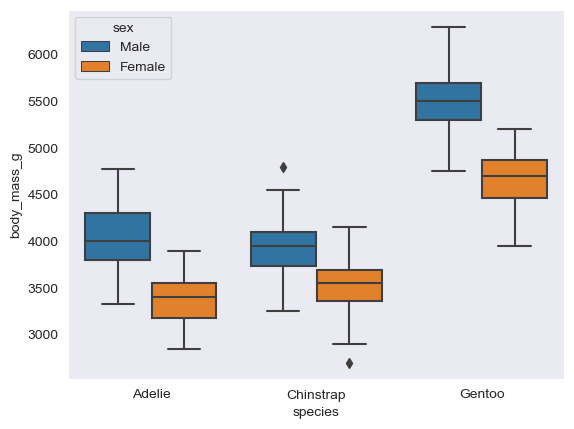

In [34]:
sns.boxplot(data=penguins,
            x='species',
            y='body_mass_g',
            hue='sex');

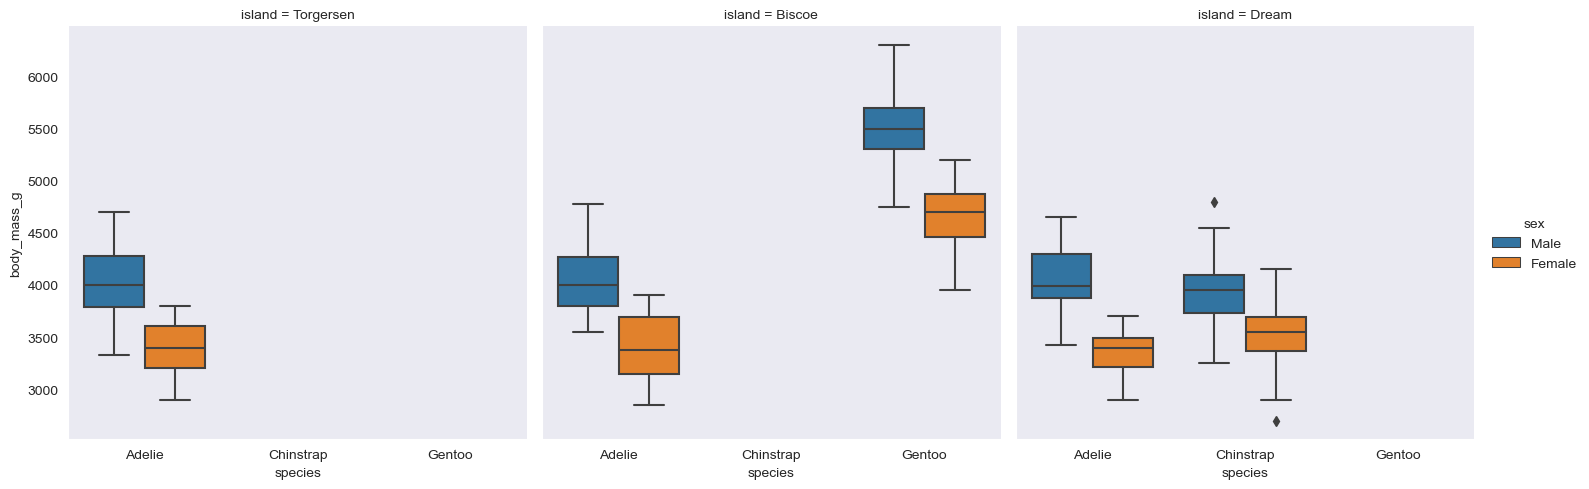

In [35]:
sns.catplot(data=penguins,
            x='species',
            y='body_mass_g',
            col='island',
            hue='sex',
            kind='box');

# Комбинация нескольких графиков

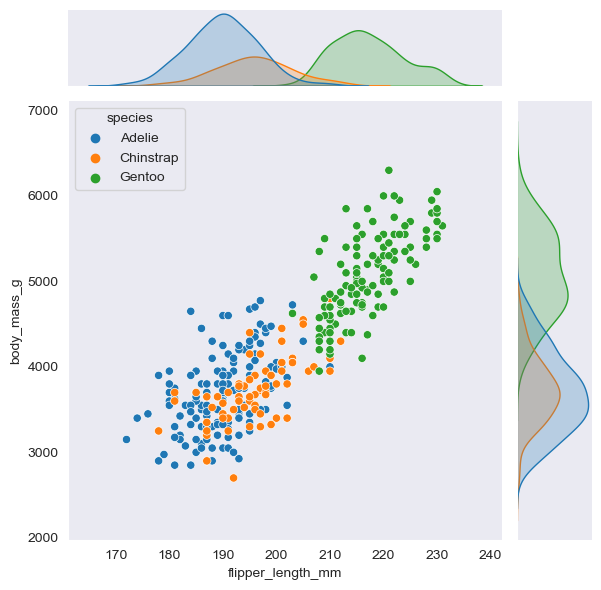

In [36]:
sns.jointplot(data=penguins,
              x='flipper_length_mm',
              y='body_mass_g',
              hue='species');

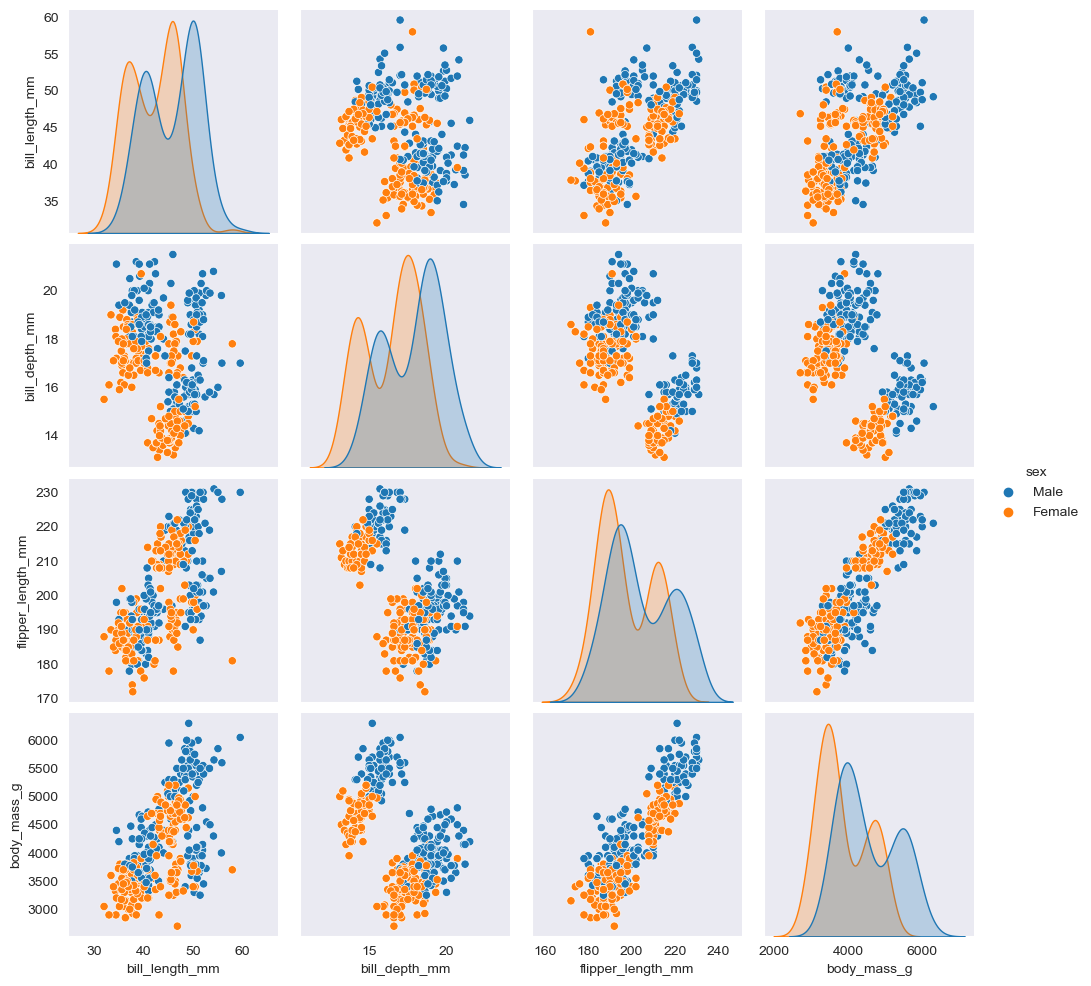

In [37]:
sns.pairplot(penguins, hue='sex');

# цветовая палитра

в Seaborn предусмотрено множество функций для работы с палитрами и их создания. Просто взглянуть на палитру можно с помощью функции color_palette()

In [44]:
#https://pyprog.pro/sns/sns_12_color_setting.html

In [40]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]